# 1. Setup

In [10]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from k_nearest import KNearestNeighbors
import pandas as pd

# 2. Wine Classification (Sci-Kit)
First we'll test the data on the built in sci-kit wine classification dataset

In [11]:

# Load the Wine dataset
wine = load_wine()
X, y = wine.data, wine.target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features for better distance-based performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:

# Initialize and train your KNN classifier
knn = KNearestNeighbors(k=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
predictions = knn.predict(X_test_scaled)
print("Predictions:", predictions)

# Manually compute and print accuracy
accuracy = np.sum(predictions == y_test) / len(y_test)
print(f"Accuracy: {accuracy:.2f}")


Predictions: [0 0 2 0 1 0 1 2 1 2 0 2 0 2 0 1 1 1 0 1 0 1 1 2 2 2 1 0 1 0 0 1 2 0 0 0]
Accuracy: 0.94


We get an accuracy of 94%, which is really good. Compared to the perceptron, which had at best a 94% accuracy but still subject to a lot of variance in its effeciency. We can also examine how the accuracy changes as we increase the parameter $k$:


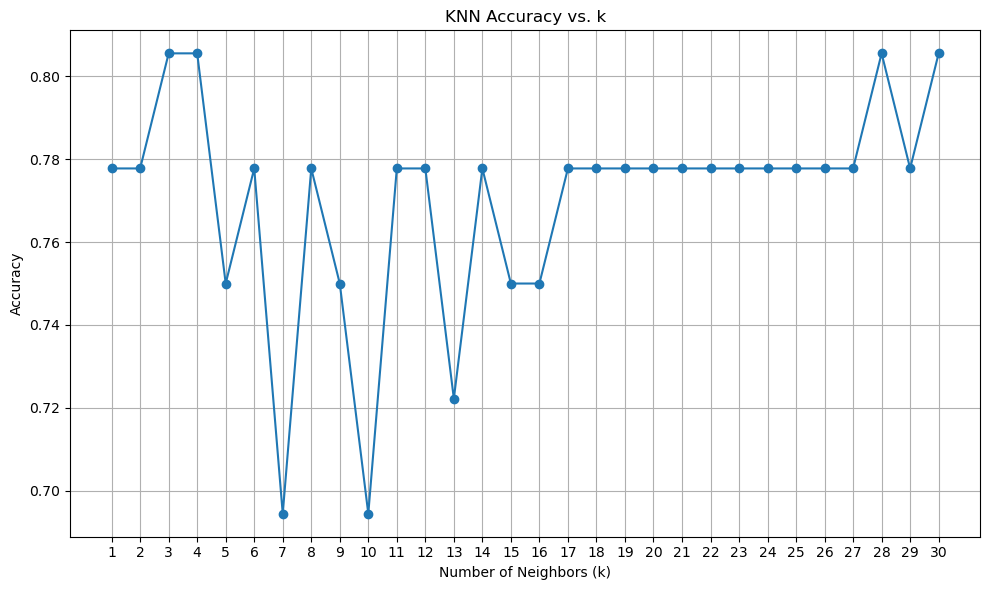

In [13]:
import matplotlib.pyplot as plt

# Track accuracies for different values of k
k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNearestNeighbors(k=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()

As we see, there isn't really a huge advantage to increasing the number of neighbors past 3. 


# 3. External Wine Dataset

This dataset uses multiple different features of the wine, and has a final variable "quality" which is a variable on the scale of 1 to 10. We'll pretend it's a categorical variable for the sake of testing our algorithm.


In [14]:
df = pd.read_csv('WineQT.csv')

# Split into features (X) and target (y)
X = df.drop(columns='quality').values
y = df['quality'].values

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN classifier
knn = KNearestNeighbors(k=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Calculate accuracy
accuracy = knn.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.52


We got a classification accuarcy of 52%, which is pretty good considering that if we had randomly selected a number, it would have been 10%. We'll also check how the accuracy changes with different k values.

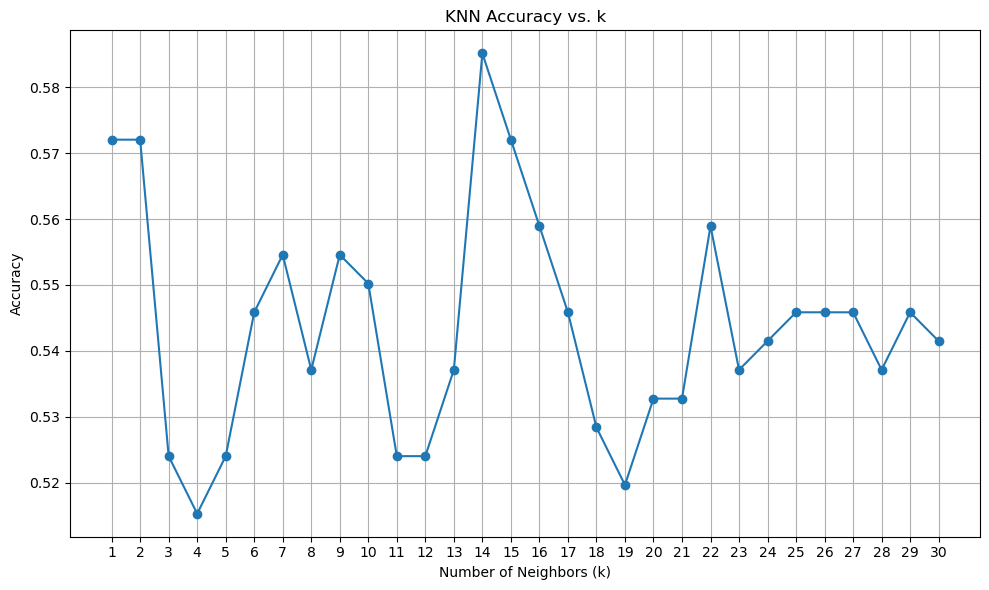

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from k_nearest import KNearestNeighbors  # Adjust path if needed

# Load dataset
df = pd.read_csv('WineQT.csv')

# Split into features (X) and target (y)
X = df.drop(columns='quality').values
y = df['quality'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Track accuracies for different values of k
k_values = range(1, 31)
accuracies = []

for k in k_values:
    knn = KNearestNeighbors(k=k)
    knn.fit(X_train, y_train)
    acc = knn.score(X_test, y_test)
    accuracies.append(acc)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title('KNN Accuracy vs. k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()
plt.show()


Similar to before, while there is an optimal number of neighbors, there is no specific reason that we would be able to point to chosing one number over another, especially since the difference between the best and worst value is theoretically pretty arbitrary. 